물고기 length를 받아서 weight를 예측하는 모델을 저장하기 위한 노트

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

편의상 길이, 무게 변수를 바꿔줌편의상 길이, 무게 변수를 바꿔줌

In [7]:
x = perch_length
y = perch_weight

모델fit을 하기위해 train, test 세트로 나누는 메소드 사용. 단, 모델fit을 하기위해서는 x가 2d array여야해서 다음에 바꿔줌

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_output, test_output = train_test_split(x,y, random_state=42)
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

x(input)을 2d array로 바꿔줌

In [23]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

모델 적용, hyper parameter 생각 - gridsearch

In [24]:
from sklearn.neighbors import KNeighborsRegressor

fkr = KNeighborsRegressor(n_neighbors=3)
fkr.fit(train_input, train_output)

KNeighborsRegressor(n_neighbors=3)

In [26]:
fkr.score(train_input, train_output)
#fkr.score(test_input, test_output)

0.9804899950518966

In [27]:
t_input = test_input[2]
p = fkr.predict(t_input.reshape(1, -1))

print(f"예측 사용 무게:{p}")
print(f"실무게:{test_output[2]}")

예측 사용 무게:[247.66666667]
실무게:250.0


모델 저장

In [30]:
import pickle

with open("weight_pred.pkl", "wb") as f:
    pickle.dump(fkr, f)

그래프 실험

In [5]:
b, a = np.polyfit(perch_length, perch_weight, deg=1)
xseq = np.linspace(10, 50, num=50)

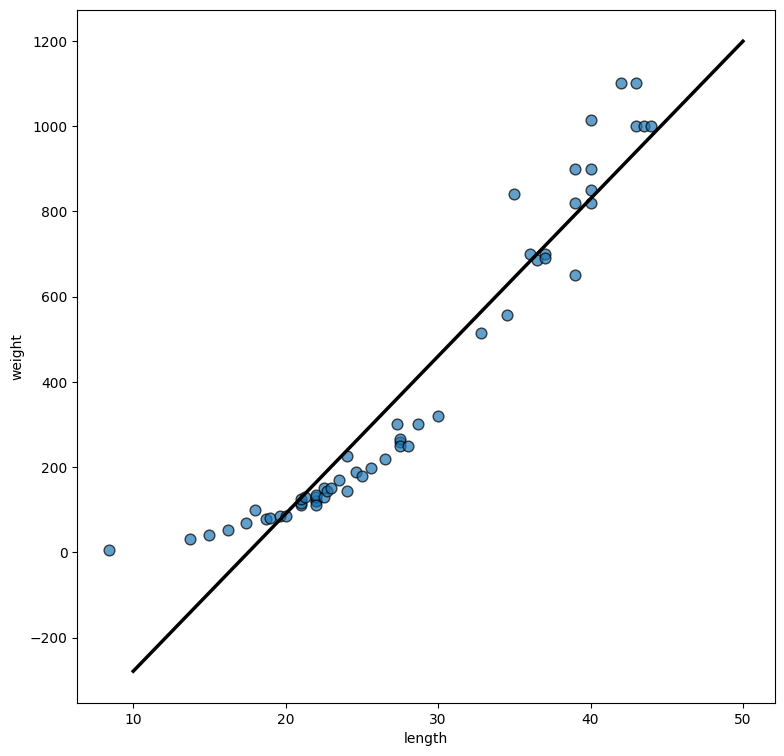

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))
#plt.scatter(perch_length, perch_weight)
ax.scatter(perch_length, perch_weight, s=60, alpha=0.7, edgecolors="k")
plt.xlabel('length')
plt.ylabel('weight')
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.show()